In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adarshmehra10","key":"9eeb789c89ebcd57b9c72feefd1e9eeb"}'}

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 342M/346M [00:05<00:00, 87.5MB/s]
100% 346M/346M [00:05<00:00, 70.8MB/s]


In [ ]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jpg  
  inflating: seg_train/seg_train/mountain/7695.jp

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.utils import shuffle
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import numpy as np
import os
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix as CM

Using TensorFlow backend.


In [ ]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just pre

In [ ]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'Water_Body', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [ ]:
Images, Labels = get_images('seg_train/seg_train/') #Extract the training images from the folders.
Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [ ]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


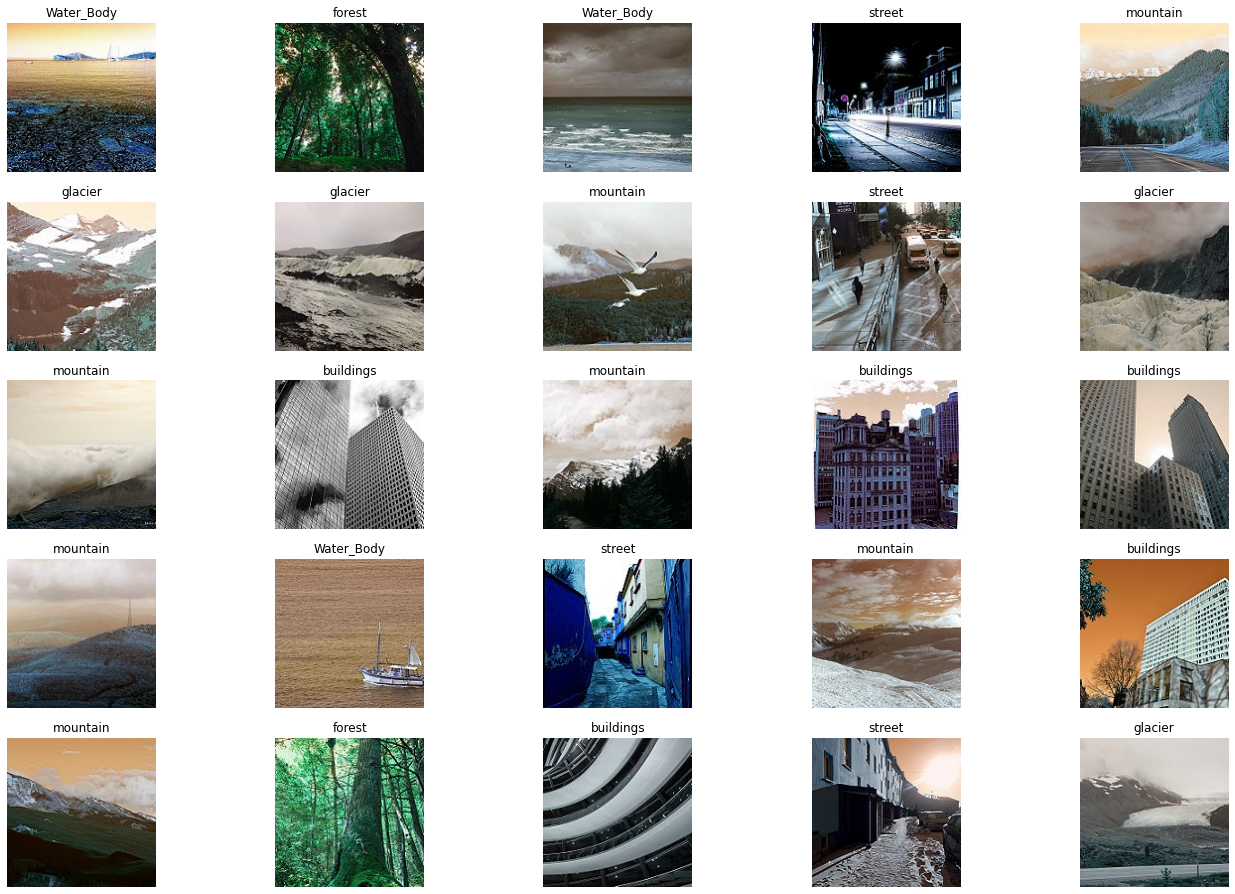

In [ ]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('seg_train/seg_train',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [ ]:


test_set = test_datagen.flow_from_directory('seg_test/seg_test', 
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 3000 images belonging to 6 classes.


In [ ]:

# Initialising the CNN
classifier = Sequential()

  # Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))

  # Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

  # Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

  # Step 3 - Flattening
classifier.add(Flatten())

  # Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(6, activation = 'softmax'))

  # Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [ ]:
trained = classifier.fit(training_set,
                         steps_per_epoch = 14034//32,
                         epochs = 15,
                         validation_data = test_set,
                         validation_steps = 3000//32)

classifier.save('my_model.h5') 

Epoch 1/15
438/438 [==============================] - 76s 174ms/step - loss: 0.9704 - accuracy: 0.6345 - val_loss: 0.7830 - val_accuracy: 0.6986
Epoch 2/15
438/438 [==============================] - 76s 173ms/step - loss: 0.7223 - accuracy: 0.7340 - val_loss: 0.6469 - val_accuracy: 0.7658
Epoch 3/15
438/438 [==============================] - 75s 172ms/step - loss: 0.6046 - accuracy: 0.7790 - val_loss: 0.5895 - val_accuracy: 0.7917
Epoch 4/15
438/438 [==============================] - 76s 172ms/step - loss: 0.5457 - accuracy: 0.8045 - val_loss: 0.5404 - val_accuracy: 0.8145
Epoch 5/15
438/438 [==============================] - 76s 173ms/step - loss: 0.4981 - accuracy: 0.8225 - val_loss: 0.5388 - val_accuracy: 0.8112
Epoch 6/15
438/438 [==============================] - 76s 174ms/step - loss: 0.4540 - accuracy: 0.8362 - val_loss: 0.4745 - val_accuracy: 0.8374
Epoch 7/15
438/438 [==============================] - 75s 172ms/step - loss: 0.4214 - accuracy: 0.8471 - val_loss: 0.5415 - val_ac

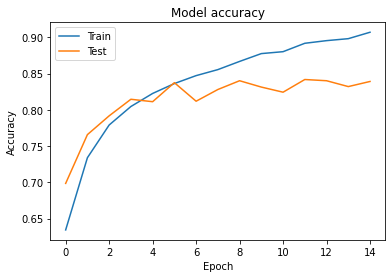

In [ ]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')          
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

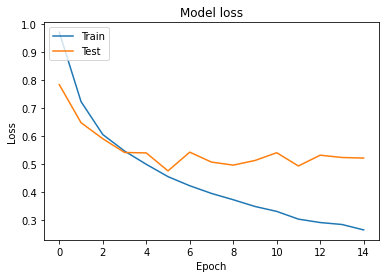

In [ ]:
plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
pred_images,no_labels = get_images('seg_pred/')

pred_images = np.array(pred_images)

pred_images.shape

(7301, 150, 150, 3)

In [ ]:
# USAGE
# python text_detection.py --image images/lebron_james.jpg --east frozen_east_text_detection.pb

# import the necessary packages
from imutils.object_detection import non_max_suppression
import numpy as np
import argparse
import time
import cv2

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", type=str,
	help="path to input image")
ap.add_argument("-east", "--east", type=str,
	help="path to input EAST text detector")
ap.add_argument("-c", "--min-confidence", type=float, default=0.5,
	help="minimum probability required to inspect a region")
ap.add_argument("-w", "--width", type=int, default=320,
	help="resized image width (should be multiple of 32)")
ap.add_argument("-e", "--height", type=int, default=320,
	help="resized image height (should be multiple of 32)")
args = vars(ap.parse_args())

# load the input image and grab the image dimensions
image = cv2.imread(args["image"])
orig = image.copy()
(H, W) = image.shape[:2]

# set the new width and height and then determine the ratio in change
# for both the width and height
(newW, newH) = (args["width"], args["height"])
rW = W / float(newW)
rH = H / float(newH)

# resize the image and grab the new image dimensions
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

# define the two output layer names for the EAST detector model that
# we are interested -- the first is the output probabilities and the
# second can be used to derive the bounding box coordinates of text
layerNames = [
	"feature_fusion/Conv_7/Sigmoid",
	"feature_fusion/concat_3"]

# load the pre-trained EAST text detector
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet(args["east"])

# construct a blob from the image and then perform a forward pass of
# the model to obtain the two output layer sets
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
	(123.68, 116.78, 103.94), swapRB=True, crop=False)
start = time.time()
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
end = time.time()

# show timing information on text prediction
print("[INFO] text detection took {:.6f} seconds".format(end - start))

# grab the number of rows and columns from the scores volume, then
# initialize our set of bounding box rectangles and corresponding
# confidence scores
(numRows, numCols) = scores.shape[2:4]
rects = []
confidences = []

# loop over the number of rows
for y in range(0, numRows):
	# extract the scores (probabilities), followed by the geometrical
	# data used to derive potential bounding box coordinates that
	# surround text
	scoresData = scores[0, 0, y]
	xData0 = geometry[0, 0, y]
	xData1 = geometry[0, 1, y]
	xData2 = geometry[0, 2, y]
	xData3 = geometry[0, 3, y]
	anglesData = geometry[0, 4, y]

	# loop over the number of columns
	for x in range(0, numCols):
		# if our score does not have sufficient probability, ignore it
		if scoresData[x] < args["min_confidence"]:
			continue

		# compute the offset factor as our resulting feature maps will
		# be 4x smaller than the input image
		(offsetX, offsetY) = (x * 4.0, y * 4.0)

		# extract the rotation angle for the prediction and then
		# compute the sin and cosine
		angle = anglesData[x]
		cos = np.cos(angle)
		sin = np.sin(angle)

		# use the geometry volume to derive the width and height of
		# the bounding box
		h = xData0[x] + xData2[x]
		w = xData1[x] + xData3[x]

		# compute both the starting and ending (x, y)-coordinates for
		# the text prediction bounding box
		endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
		endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
		startX = int(endX - w)
		startY = int(endY - h)

		# add the bounding box coordinates and probability score to
		# our respective lists
		rects.append((startX, startY, endX, endY))
		confidences.append(scoresData[x])

# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
boxes = non_max_suppression(np.array(rects), probs=confidences)

# loop over the bounding boxes
for (startX, startY, endX, endY) in boxes:
	# scale the bounding box coordinates based on the respective
	# ratios
	startX = int(startX * rW)
	startY = int(startY * rH)
	endX = int(endX * rW)
	endY = int(endY * rH)

	# draw the bounding box on the image
	cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)

# show the output image
cv2.imshow("Text Detection", orig)
cv2.waitKey(0)

In [ ]:
import tensorflow as tf
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("my_model.h5")

def model_predict(img_path, classifier):
    new_img = image.load_img(img_path, target_size=(150, 150))

    img = image.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    print("Following is our prediction:")
    
    
    pred_class = get_classlabel(classifier.predict_classes(img)[0])
    pred_prob = classifier.predict(img).reshape(6)
    print(pred_class)

preds = model_predict("images3.jpg", model)


Following is our prediction:
Water_Body
